# TUGAS 5

K-MEAN CLUSTERING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

Menampilkan Dataset

In [ ]:
url = "https://raw.githubusercontent.com/FirdatulFitriyah/datamining/main/iris.csv"
#colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
x = pd.read_csv(url)
x.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Menentukan fitur yang akan dikelompokkan.

Disini fitur yang akan digunakan adalah SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

In [ ]:
iris = pd.read_csv("iris.csv")
x_new = iris.iloc[:, [0, 1, 2, 3]].values

In [ ]:
# number of clusters
kmeans = KMeans (n_clusters=3)
# fitting the input data
kmeans = kmeans.fit(x_new)
# Getting the cluster labels
prediksi = kmeans.predict(x_new)
# Centroid values
centroids = kmeans.cluster_centers_


In [ ]:
prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
x_new[:,1:2].shape

(150, 1)

Melakukan normalisasi data dengan menggunakan metode Min Max Scaler.

Normalisasi data digunakan untuk memperkecil jarak antar sehingga memudahkan dalam proses perhitungan.

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_new)
x_scaled
dataframe= pd.DataFrame(x_scaled, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']) 
print (dataframe)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.222222      0.625000       0.067797      0.041667
1         0.166667      0.416667       0.067797      0.041667
2         0.111111      0.500000       0.050847      0.041667
3         0.083333      0.458333       0.084746      0.041667
4         0.194444      0.666667       0.067797      0.041667
..             ...           ...            ...           ...
145       0.666667      0.416667       0.711864      0.916667
146       0.555556      0.208333       0.677966      0.750000
147       0.611111      0.416667       0.711864      0.791667
148       0.527778      0.583333       0.745763      0.916667
149       0.444444      0.416667       0.694915      0.708333

[150 rows x 4 columns]


Menentukan dan mengonfigurasi fungsi k-means dengan mengelompokkan data menjadi 3 cluster

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)

In [ ]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

Menentukan nilai centroid

In [ ]:
print(kmeans.cluster_centers_)

[[0.19611111 0.595      0.07830508 0.06083333]
 [0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]]


Menambahkan kolom cluster pada dataframe

In [ ]:
x["kluster"] = kmeans.labels_

Visualisasi hasil clustering

**Cara 1**

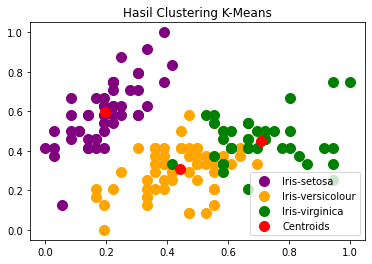

In [ ]:
#Visualising the clusters
plt.title("Hasil Clustering K-Means")
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

**Cara 2**

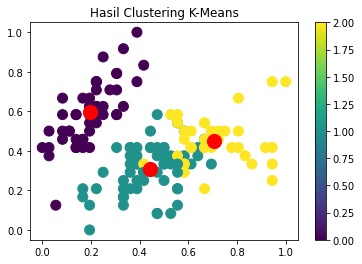

In [ ]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = x.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=200, alpha=1 , marker="o");
plt.title("Hasil Clustering K-Means")
plt.colorbar (output)
plt.show()

Dari seluruh hasil percobaan tes split yang telah dilakukan, maka diperoleh hasil split terbaik adalah split 3 yang mwemberikan keuntungan informasi sebesar 0.0005490214732508658, karena hasil tes split 3 memiliki nilai split yang terendah.